In [58]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [55]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Нужно создать алгоритм построения интерполяционного многочлена Лагранжа

Построим график заданной функции (tg x) на участке от 0 до 1:

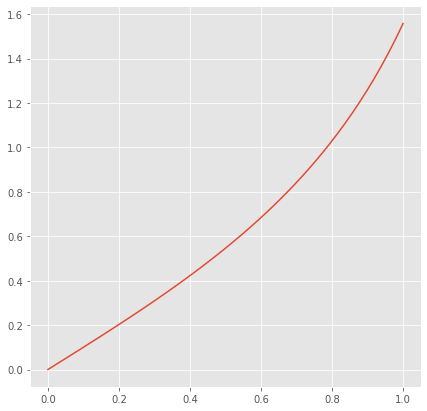

In [60]:
plt.figure(figsize(7, 7))
x = np.linspace(0, 1, 50)
y = np.tan(x)

plt.plot(x, y);

Массив опорных точек:

In [61]:
X = np.array([0, 0.25, 0.5, 0.75, 1])
Y = np.tan(X)

In [62]:
print('X:', X)
print('Y:', Y)

X: [0.   0.25 0.5  0.75 1.  ]
Y: [0.         0.25534192 0.54630249 0.93159646 1.55740772]


Функция для вычисления многочлена Лагранжа:

In [63]:
def Lagr(A, X, Y):
    result = []
    for i in range(X.shape[0]):
        numer = 1
        denom = 1
        for j, value in enumerate(X):
            if j == i:
                continue
            numer *= (A - value)
            
        for j, value in enumerate(X):
            if j == i:
                continue
            denom *= (X[i] - value)        
        n = (numer / denom) * Y[i]
        result.append(n)
    return np.sum(result)

Значения многочлена Лагранжа в заданных точках:

In [64]:
print('Значение в точке 0.2: %.5f' % Lagr(0.2, X, Y))
print('Значение в точке 0.25: %.5f' % Lagr(0.25, X, Y))

Значение в точке 0.2: 0.20176
Значение в точке 0.25: 0.25534


Построим график исходной функции и интерполяционного многочлена в одних осях:

In [65]:
Y_Lagr = []

for i in np.linspace(0, 1, 15):
    Y_Lagr.append(Lagr(i, X, Y))

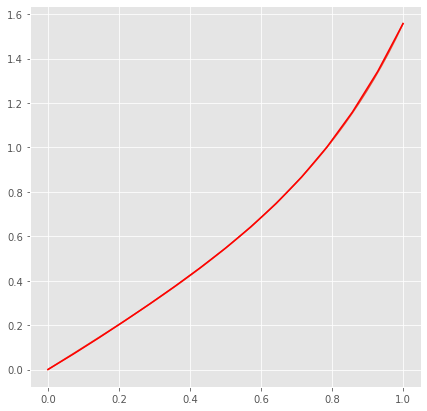

In [66]:
plt.plot(x, y);
plt.plot(np.linspace(0, 1, 15), Y_Lagr, color = 'r');

Для лучшей наглядности построим график исходной функции и точки, полученные с помощью многочлена Лагранжа:

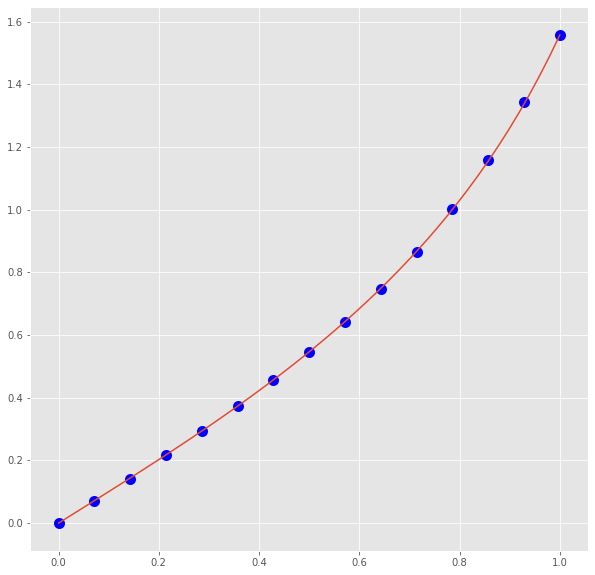

In [68]:
plt.figure(figsize(10, 10))
plt.plot(x, y);
plt.scatter(np.linspace(0, 1, 15), Y_Lagr, color = 'b', linewidths = 5);